In [134]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
n_sample = 1000
data = []
gn = np.random.normal(0, 1, n_sample+3)

for idx in range(n_sample):
    data.append(0.1*gn[idx+3] + 0.5*gn[idx+2] - 0.5*gn[idx+1] + 0.1*gn[idx])

(0.0, 1000.0)

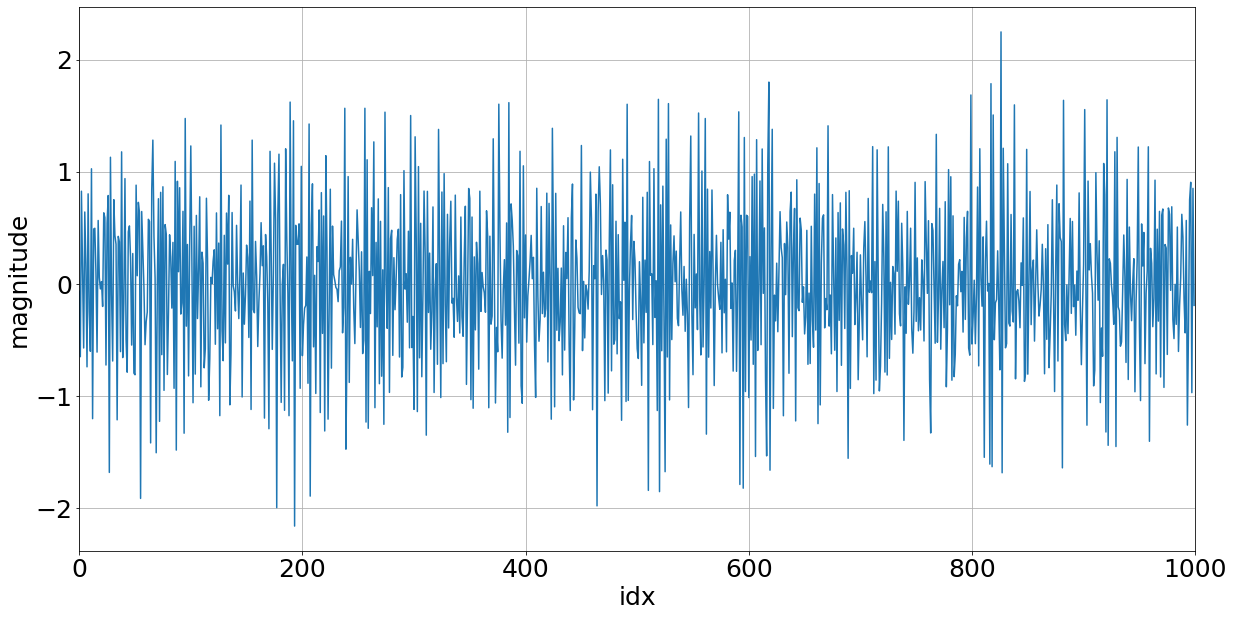

In [136]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(data)
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)
ax.grid()
ax.set_xlabel('idx', fontsize=25)
ax.set_ylabel('magnitude', fontsize=25)
ax.set_xlim(0,1000)

In [137]:
X = []
y = []
COV_X = []
for three_sample_before, two_sample_before, one_sample_before, curr in zip(data[0:-3:],data[1:-2:], data[2:-1:], data[3::]):
    vector1 = np.array([one_sample_before, two_sample_before, three_sample_before])
    #vector2 = np.array([curr, one_sample_before, two_sample_before])
    vector2 = np.array([one_sample_before, two_sample_before, three_sample_before]) # for R
    X.append(vector1)
    y.append(curr) # target
    COV_X.append(vector2)
X = np.vstack(X)
y = np.array(y) # target
COV_X = np.vstack(COV_X)

In [138]:
R = np.cov(COV_X.T)
p = y.dot(X)/len(y)
w = np.linalg.inv(R).dot(p)
prediction = X.dot(w)

In [139]:
w

array([-0.66079863, -0.4019683 , -0.18488492])

(0.0, 1000.0)

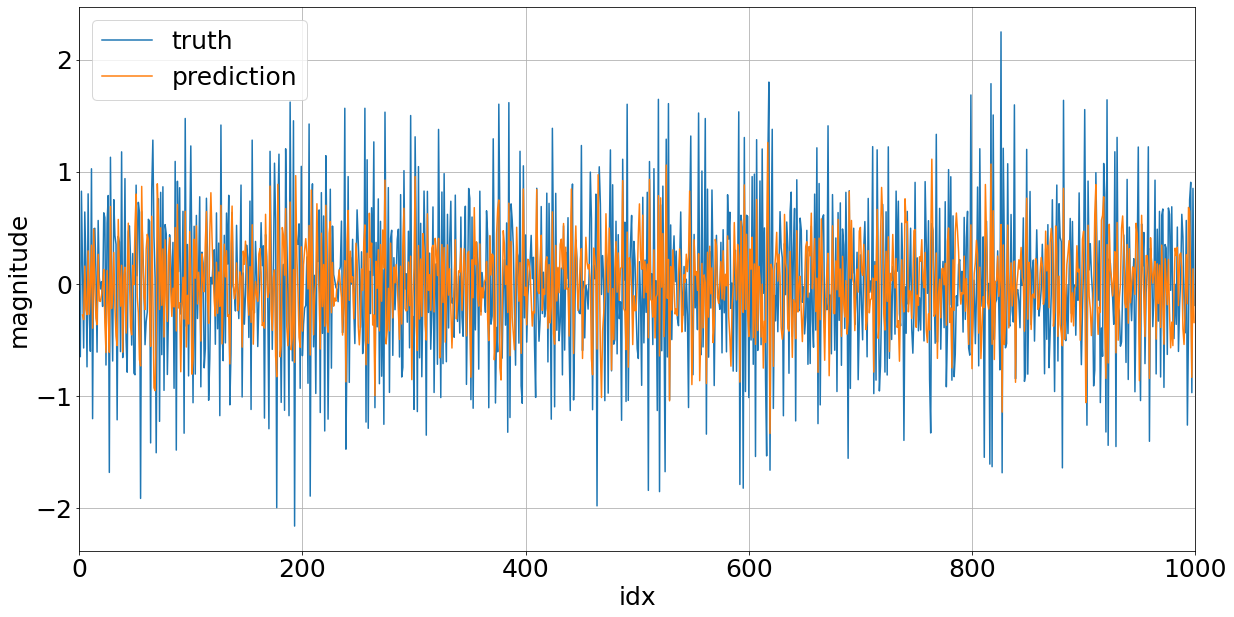

In [140]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(data, label='truth')
ax.plot(np.arange(3,n_sample), prediction, label='prediction')
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)
ax.grid()
ax.set_xlabel('idx', fontsize=25)
ax.set_ylabel('magnitude', fontsize=25)
ax.legend(fontsize=25)
ax.set_xlim(0,1000)

In [141]:
error = y.dot(y)/n_sample - p.dot(w)

In [142]:
error

0.3521005544293727